# <center>Twitter 文本挖掘</center>

<center>易红发 yihongfa@yeah.net

# Python入门

## 一 列表 list

In [1]:
l1 = ['yuwen', 'shuxue', 'wuli', 80, 99, 78]
l2 = [1,2,3,4,5,6,7,8]
l3 = ['a', 'b', 'c', 'd', 'e']

### 索引与切片

In [2]:
print l1[1]
print
print l2[0]
print
print l3[1:3]

shuxue

1

['b', 'c']


### 列表增删

In [8]:
l1.append('shengwu')
print l1

['yuwen', 'shuxue', 'wuli', 80, 99, 78, 'shengwu', 'shengwu']


In [9]:
l1.remove('shengwu')
print l1

['yuwen', 'shuxue', 'wuli', 80, 99, 78, 'shengwu']


In [10]:
del l2[1]
print l2

[1, 3, 4, 5, 6, 7, 8]


In [12]:
l3.extend('f')
print l3

['a', 'b', 'c', 'd', 'e', 'f', 'f']


In [13]:
l1.extend(['dili', 78, 'lishi', 89])
print l1

['yuwen', 'shuxue', 'wuli', 80, 99, 78, 'shengwu', 'dili', 78, 'lishi', 89]


In [14]:
l1.append(['dili', 78, 'lishi', 89])
print l1

['yuwen', 'shuxue', 'wuli', 80, 99, 78, 'shengwu', 'dili', 78, 'lishi', 89, ['dili', 78, 'lishi', 89]]


### 列表推导

l2中的元素如何都加上2

In [17]:
ls=[]
for i in l2:
    i+=2
    ls.append(i)

print ls

[3, 5, 6, 7, 8, 9, 10]


In [18]:
[i+2 for i in l2]

[3, 5, 6, 7, 8, 9, 10]

## 二 字典 dict

d = {key1:value1, key2:value2}  
键必须唯一

In [19]:
dict1 = {'shuxue':88, 'yuwen':77, 'yingyu':99}

### 索引

In [20]:
print dict1[1]

KeyError: 1

In [21]:
print dict1['shuxue']

88


## 元组与集合

In [26]:
tup1 = (1,2,3)

In [27]:
del tup1[1]

TypeError: 'tuple' object doesn't support item deletion

In [28]:
lp = [1,1,2,3,4,5,4,3,1,3,4,5,6,7,8,5,4,3,44,5,5,3,2,2,3]

In [29]:
sep = set(lp)
print sep

set([1, 2, 3, 4, 5, 6, 7, 8, 44])


In [30]:
lps = list(sep)
print lps

[1, 2, 3, 4, 5, 6, 7, 8, 44]


# Twitter and Twitter API 

Twitter implements OAuth 1.0A as its standard authentication mechanism, and in order to use it to make requests to Twitter's API, you'll need to go to https://dev.twitter.com/apps and create a sample application. There are four primary identifiers you'll need to note for an OAuth 1.0A workflow: consumer key, consumer secret, access token, and access token secret. Note that you will need an ordinary Twitter account in order to login, create an app, and get these credentials.

<img src="https://raw.githubusercontent.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition/master/ipynb/resources/ch01-twitter/images/Twitter-AppCredentials.png" width="600px">

# <center>开始挖掘Twitter

## 1. 创建一个应用程序并获得授权

In [7]:
import twitter

# XXX: Go to http://dev.twitter.com/apps/new to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://dev.twitter.com/docs/auth/oauth for more information 
# on Twitter's OAuth implementation.

CONSUMER_KEY = 'sUSI6j1XZDmSgUbtn23uEYdU7'
CONSUMER_SECRET ='SgbkeNc9knFLTJqG5FYSpggYu2Jvd1dDi0VxlYV8eySdfzQzTL'
OAUTH_TOKEN = '2360603814-9UmdwpTg44wuFT5n3wlXwHvDTNgdn0a05pTVT3f'
OAUTH_TOKEN_SECRET = 'zGPn0Ivxfq2rsHGRLXmKkuwQFUMMmQSROAIuDFuBJMrKt'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print twitter_api

## 2. 热门话题挖掘

In [8]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

print world_trends
print
print us_trends

[{u'created_at': u'2017-03-04T06:38:05Z', u'trends': [{u'url': u'http://twitter.com/search?q=%23MaineCelebration', u'query': u'%23MaineCelebration', u'tweet_volume': 513462, u'name': u'#MaineCelebration', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23WeLoveYouAriana', u'query': u'%23WeLoveYouAriana', u'tweet_volume': 13763, u'name': u'#WeLoveYouAriana', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23%D9%87%D8%A7%D9%84%D8%AD%D8%B2%D9%87_%D9%88%D8%AF%D9%83_%D9%81%D9%8A', u'query': u'%23%D9%87%D8%A7%D9%84%D8%AD%D8%B2%D9%87_%D9%88%D8%AF%D9%83_%D9%81%D9%8A', u'tweet_volume': None, u'name': u'#\u0647\u0627\u0644\u062d\u0632\u0647_\u0648\u062f\u0643_\u0641\u064a', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23PORvMIN', u'query': u'%23PORvMIN', u'tweet_volume': None, u'name': u'#PORvMIN', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23%E0%A4%95%E0%A4%BE%E0%A4%B6%E0%A5%80_%E0%A4%95%E0%A4%BE_%E0%A4%97%E

### Json格式打印

In [9]:
import json

print json.dumps(world_trends, indent=1)
print
print json.dumps(us_trends, indent=1)

[
 {
  "created_at": "2017-03-04T06:38:05Z", 
  "trends": [
   {
    "url": "http://twitter.com/search?q=%23MaineCelebration", 
    "query": "%23MaineCelebration", 
    "tweet_volume": 513462, 
    "name": "#MaineCelebration", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23WeLoveYouAriana", 
    "query": "%23WeLoveYouAriana", 
    "tweet_volume": 13763, 
    "name": "#WeLoveYouAriana", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23%D9%87%D8%A7%D9%84%D8%AD%D8%B2%D9%87_%D9%88%D8%AF%D9%83_%D9%81%D9%8A", 
    "query": "%23%D9%87%D8%A7%D9%84%D8%AD%D8%B2%D9%87_%D9%88%D8%AF%D9%83_%D9%81%D9%8A", 
    "tweet_volume": null, 
    "name": "#\u0647\u0627\u0644\u062d\u0632\u0647_\u0648\u062f\u0643_\u0641\u064a", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23PORvMIN", 
    "query": "%23PORvMIN", 
    "tweet_volume": null, 
    "name": "#PORvMIN", 
    "promoted_content": null
   }, 
   

### 内容索引

In [17]:
world_trends[0]["trends"][0]["name"]

u'#MaineCelebration'

## 3 计算交集

In [18]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)

print common_trends

set([u'#WeLoveYouAriana', u'#LivePD', u'#SterolineJuneWedding', u'#UnusualLuckyCharms', u'#PORvMIN', u'#ScareYourNeighborAwayBy', u'Patty Mills', u'#MaineCelebration', u'#TheRapGame', u'#Bellator174'])


In [19]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set & us_trends_set #合集 |，差集 -

print common_trends

set([u'#WeLoveYouAriana', u'#LivePD', u'#SterolineJuneWedding', u'#UnusualLuckyCharms', u'#PORvMIN', u'#ScareYourNeighborAwayBy', u'Patty Mills', u'#MaineCelebration', u'#TheRapGame', u'#Bellator174'])


### 交集索引

In [20]:
common_trends[1]

TypeError: 'set' object does not support indexing

In [22]:
common_trens_li = list(common_trends)

In [23]:
common_trens_li[1]

u'#LivePD'

## 4 搜索推文

In [64]:
# Import unquote to prevent url encoding errors in next_results
from urllib import unquote

# XXX: Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.

q = '#Election2016' 

count = 100

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor

for _ in range(5):
    print "Length of statuses", len(statuses)
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError, e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print json.dumps(statuses[0], indent=1)

Length of statuses 100
Length of statuses 200
Length of statuses 300
Length of statuses 400
Length of statuses 500
{
 "contributors": null, 
 "truncated": false, 
 "text": "Kellyanne Conway: 'alternative facts' was my Oscars blunder: Senior White House adviser says media\u2026 https://t.co/cR8RmjAN8w | #Election2016", 
 "is_quote_status": false, 
 "in_reply_to_status_id": null, 
 "id": 837932052590665729, 
 "favorite_count": 0, 
 "entities": {
  "symbols": [], 
  "user_mentions": [], 
  "hashtags": [
   {
    "indices": [
     126, 
     139
    ], 
    "text": "Election2016"
   }
  ], 
  "urls": [
   {
    "url": "https://t.co/cR8RmjAN8w", 
    "indices": [
     100, 
     123
    ], 
    "expanded_url": "http://m.tbnn.it/NXR2Dy", 
    "display_url": "m.tbnn.it/NXR2Dy"
   }
  ]
 }, 
 "retweeted": false, 
 "coordinates": null, 
 "source": "<a href=\"https://dlvrit.com/\" rel=\"nofollow\">dlvr.it</a>", 
 "in_reply_to_screen_name": null, 
 "in_reply_to_user_id": null, 
 "retweet_count": 

### 结果索引

In [30]:
search_results["search_metadata"]

{u'completed_in': 0.232,
 u'count': 100,
 u'max_id': 837750192694710271L,
 u'max_id_str': u'837750192694710271',
 u'next_results': u'?max_id=837726470873182214&q=%23Election2016&count=100&include_entities=1',
 u'query': u'%23Election2016',
 u'refresh_url': u'?since_id=837750192694710271&q=%23Election2016&include_entities=1',
 u'since_id': 0,
 u'since_id_str': u'0'}

In [32]:
kwargs

{u'count': u'100',
 u'include_entities': u'1',
 u'max_id': u'837750192694710271',
 u'q': u'#Election2016'}

## 5 提取实体（文本、昵称、主题标签）

In [68]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

In [71]:
# Explore the first 5 items for each...
print json.dumps(status_texts[0:5], indent=1)
print
print json.dumps(screen_names[0:5], indent=1) 
print
print json.dumps(hashtags[0:5], indent=1)
print
print json.dumps(words[0:5], indent=1)

[
 "Kellyanne Conway: 'alternative facts' was my Oscars blunder: Senior White House adviser says media\u2026 https://t.co/cR8RmjAN8w | #Election2016", 
 "Kellyanne Conway: 'alternative facts' was my Oscars blunder: Senior White House adviser says media\u2026 https://t.co/mFoM16jxvp | #Election2016", 
 "Kellyanne Conway: 'alternative facts' was my Oscars blunder: Senior White House adviser says media\u2026 https://t.co/N1Y20jtzNI | #Election2016", 
 "Kellyanne Conway: 'alternative facts' was my Oscars blunder: Senior White House adviser says media\u2026 https://t.co/tbBLuR3Wtx | #Election2016", 
 "Kellyanne Conway: 'alternative facts' was my Oscars blunder https://t.co/cfttD6e9AU | #Election2016"
]

[
 "DonaldJTrumpJr", 
 "AP", 
 "AP", 
 "confluence19", 
 "HillaryClinton"
]

[
 "Election2016", 
 "Election2016", 
 "Election2016", 
 "Election2016", 
 "Election2016"
]

[
 "Kellyanne", 
 "Conway:", 
 "'alternative", 
 "facts'", 
 "was"
]


## 6 词频分析

In [72]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print c.most_common()[:10] # top 10
    print

[(u'#Election2016', 419), (u'|', 291), (u'House', 226), (u'for', 150), (u'was', 122), (u'my', 118), (u'Georgia', 114), (u'Conway:', 114), (u'endorses', 114), (u'Major', 114)]

[(u'oranicuhh', 20), (u'HillaryClinton', 14), (u'realDonaldTrump', 13), (u'rihanna', 8), (u'AP', 6), (u'eyesonfoxorg', 4), (u'grantstern', 4), (u'citunchained', 3), (u'TarotDarrow', 3), (u'confluence19', 3)]

[(u'Election2016', 427), (u'election2016', 136), (u'Trump', 22), (u'TrumpRussia', 10), (u'Putin', 10), (u'ImWithHer', 10), (u'GOP', 10), (u'ElectionDay', 9), (u'Russia', 8), (u'hillaryclinton', 6)]



### 词频表

In [73]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print pt

+---------------+-------+
| Word          | Count |
+---------------+-------+
| #Election2016 |   419 |
| |             |   291 |
| House         |   226 |
| for           |   150 |
| was           |   122 |
| my            |   118 |
| Georgia       |   114 |
| Conway:       |   114 |
| endorses      |   114 |
| Major         |   114 |
+---------------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| oranicuhh       |    20 |
| HillaryClinton  |    14 |
| realDonaldTrump |    13 |
| rihanna         |     8 |
| AP              |     6 |
| eyesonfoxorg    |     4 |
| grantstern      |     4 |
| citunchained    |     3 |
| TarotDarrow     |     3 |
| confluence19    |     3 |
+-----------------+-------+
+----------------+-------+
| Hashtag        | Count |
+----------------+-------+
| Election2016   |   427 |
| election2016   |   136 |
| Trump          |    22 |
| TrumpRussia    |    10 |
| Putin          |    10 |
| ImWithHer      |    10 |
|

## 7 计算词汇丰富程度

In [123]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return 1.0*total_words/len(statuses)

print lexical_diversity(words)
print lexical_diversity(screen_names)
print lexical_diversity(hashtags)
print average_words(status_texts)

0.266507013342
0.485714285714
0.174801362089
14.615


## 8 转推分析

In [124]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if status.has_key('retweeted_status')
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print pt

+-------+-------------+----------------------------------------------------+
| Count | Screen Name | Text                                               |
+-------+-------------+----------------------------------------------------+
| 77953 | oranicuhh   | RT @oranicuhh: Welp. #Election2016                 |
|       |             | https://t.co/uRyZ1x9Tlu                            |
| 77953 | oranicuhh   | RT @oranicuhh: Welp. #Election2016                 |
|       |             | https://t.co/uRyZ1x9Tlu                            |
| 77953 | oranicuhh   | RT @oranicuhh: Welp. #Election2016                 |
|       |             | https://t.co/uRyZ1x9Tlu                            |
| 77953 | oranicuhh   | RT @oranicuhh: Welp. #Election2016                 |
|       |             | https://t.co/uRyZ1x9Tlu                            |
| 77953 | oranicuhh   | RT @oranicuhh: Welp. #Election2016                 |
|       |             | https://t.co/uRyZ1x9Tlu                            |

### 找到转推用户

In [125]:
# Get the original tweet id for a tweet from its retweeted_status node 
# and insert it here in place of the sample value that is provided
# from the text of the book

_retweets = twitter_api.statuses.retweets(id=796240486428250112)
print [r['user']['screen_name'] for r in _retweets]

[u'peyoties', u'julesalinas', u'Wassup_kreasr', u'07des13', u'em2wice', u'nottooabi', u'ToxPhanGlabella', u'IsomKameron', u'kaistoe', u'MOlesberg', u'PhantomAtOpera', u'caseydarnell_', u'WYDCUTlE', u'thompsonnnic', u'DanaeGood23', u'thershallbpeace', u'tsunerny', u'andrewski1113', u'grindrmemes', u'shayyyla787']


# 9 画图

### 词频图

In [127]:
%matplotlib inline

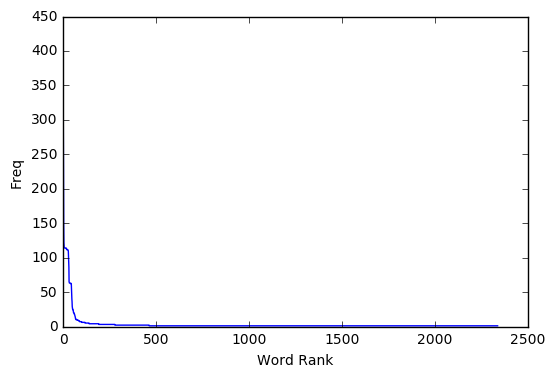

In [133]:
import matplotlib.pyplot as plt
word_counts = sorted(Counter(words).values(), reverse=True)

plt.plot(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

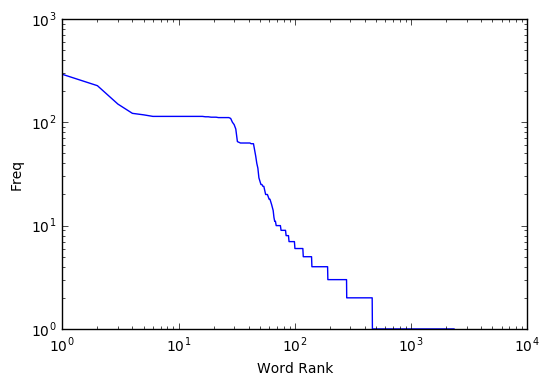

In [134]:
plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

### 直方图

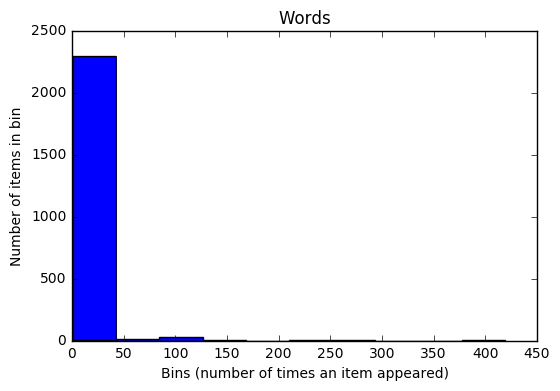

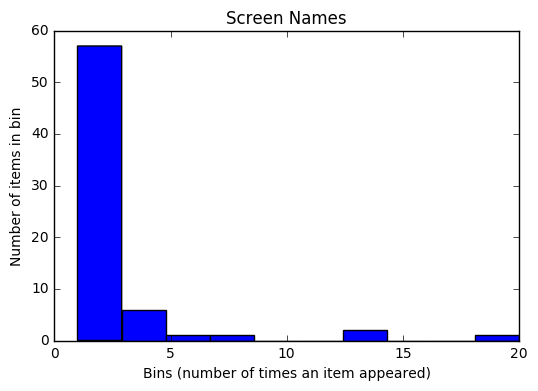

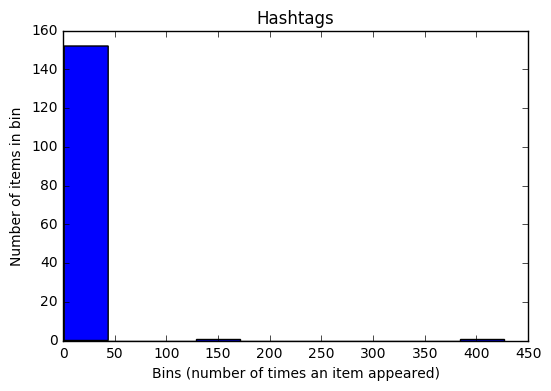

In [136]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(c.values())
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()

### 转推直方图

[4041, 24400, 2, 5, 6, 2, 2121, 1, 77953, 77953, 24, 1, 4, 8, 1, 1, 60339, 1, 46, 42, 42, 77953, 77953, 60339, 60339, 4, 1, 3, 4, 4, 4, 4, 5, 5, 4, 4, 15, 77953, 77953, 77953, 143, 112, 151, 77953, 33, 8, 512, 77953, 77953, 8, 77953, 77953, 77953, 77953, 77953, 77953, 2, 3, 77953, 77953, 2, 77953, 4, 3, 24400, 50, 3, 60339, 60339, 60339, 60339, 60339, 574, 2, 77953, 1, 2, 179, 1, 208, 3, 970, 4, 24400, 5678, 2]


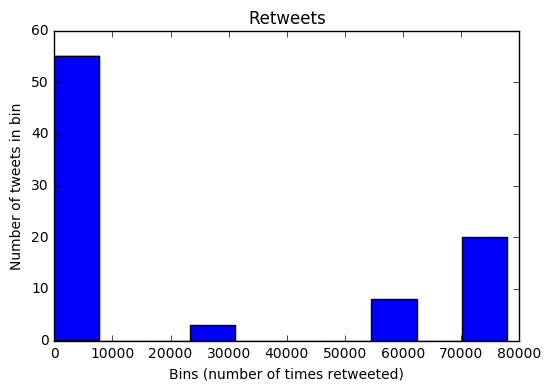

In [135]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _ in retweets]

plt.hist(counts)
plt.title("Retweets")
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

print counts

### 另一种表达

[  8.30424747  10.10233841   0.69314718   1.60943791   1.79175947
   0.69314718   7.65964295   0.          11.26386136  11.26386136
   3.17805383   0.           1.38629436   2.07944154   0.           0.
  11.00773394   0.           3.8286414    3.73766962   3.73766962
  11.26386136  11.26386136  11.00773394  11.00773394   1.38629436   0.
   1.09861229   1.38629436   1.38629436   1.38629436   1.38629436
   1.60943791   1.60943791   1.38629436   1.38629436   2.7080502
  11.26386136  11.26386136  11.26386136   4.96284463   4.71849887
   5.01727984  11.26386136   3.49650756   2.07944154   6.23832463
  11.26386136  11.26386136   2.07944154  11.26386136  11.26386136
  11.26386136  11.26386136  11.26386136  11.26386136   0.69314718
   1.09861229  11.26386136  11.26386136   0.69314718  11.26386136
   1.38629436   1.09861229  10.10233841   3.91202301   1.09861229
  11.00773394  11.00773394  11.00773394  11.00773394  11.00773394
   6.3526294    0.69314718  11.26386136   0.           0.69314718
 

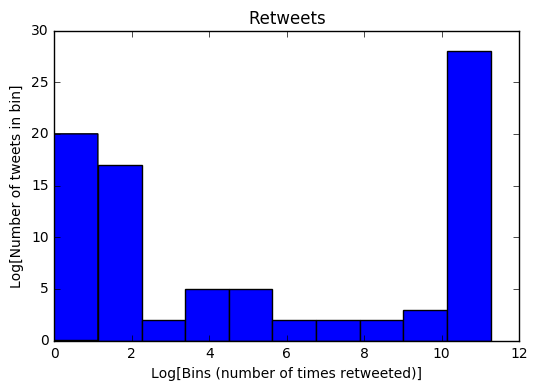

In [140]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them
import numpy as np
counts = [count for count, _, _ in retweets]

# Taking the log of the *data values* themselves can 
# often provide quick and valuable insight into the
# underlying distribution as well. Try it back on
# Example 13 and see if it helps.

plt.hist(np.log(counts))
plt.title("Retweets")
plt.xlabel('Log[Bins (number of times retweeted)]')
plt.ylabel('Log[Number of tweets in bin]')

print np.log(counts)

# <center>Than you for your attention